In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import scipy.sparse
import random
import tensorflow as tf

In [ ]:
''' load dataset from sklearn '''
from sklearn.datasets import fetch_rcv1
rcv1 = fetch_rcv1(shuffle=True)# change arrangment of sample randomly 

In [ ]:
N_SAMPLES = 7000 
from sklearn.utils import resample
X1, y1 = resample(rcv1.data, rcv1.target, replace=False,
                n_samples=N_SAMPLES, random_state=1234)
X1 = X1.toarray()
y1 = y1.toarray()

In [ ]:
!pip3 install susi

# **SUSI SOM**

In [ ]:
import susi

# initialize and fit SOM
som = susi.SOMClustering(n_rows=50,n_columns=50,n_iter_unsupervised =1000,
                         learning_rate_start=0.5,learning_rate_end=0.05)
                         
som.fit(X1)

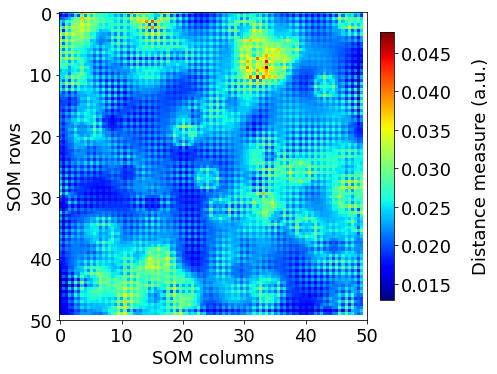

In [ ]:
from susi.SOMPlots import plot_estimation_map,plot_nbh_dist_weight_matrix,plot_som_histogram,plot_umatrix
u_matrix = som.get_u_matrix()
plot_umatrix(u_matrix, 50, 50, cmap="jet")
plt.show()

In [ ]:
clusters = som.get_clusters(X1)

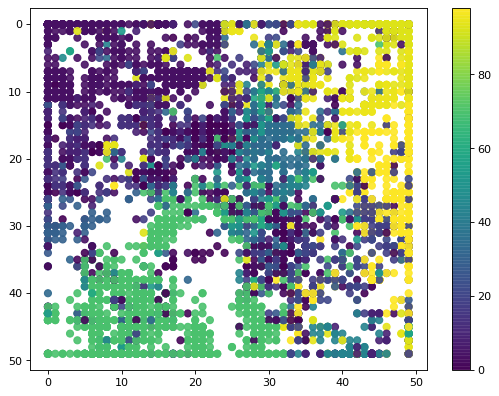

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x=[c[1] for c in clusters], y=[c[0] for c in clusters], c=np.argmax(y1, axis=1), alpha=.9,s=40)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

In [2]:
import pickle

with open('/content/y50.pickle', 'rb') as f1:
    y1 = pickle.load(f1)

with open('/content/clusters50 (1).pickle', 'rb') as f2:
    clusters_pickle = pickle.load(f2)

proj_map = np.array(clusters_pickle)

In [3]:
map_tensor = np.zeros(shape = (50,50,y1.shape[1]))
for i in range(50):
  for j in range(50):
    location = np.where((proj_map[:,0]==i) & (proj_map[:,1]==j) )
    if(len(location) !=0):
      for k in location[0]:
        for n in range(y1.shape[1]):
          map_tensor[i,j,n]+=y1[k,n]


In [4]:
aggregated_max = 0
aggregated_sum = 0
for i in range(50):
  for j in range(50):
    aggregated_max += np.max(map_tensor[i,j,:])
    aggregated_sum += np.sum(map_tensor[i,j,:])
print("Purity is:",aggregated_max/y1.shape[0]*100.0)

Purity is: 91.95714285714286


**Purity based on all labels aproach is: 91.95%**

In [7]:
map_tensor = np.zeros(shape = (50,50,y1.shape[1]))
for i in range(50):
  for j in range(50):
    location = np.where((proj_map[:,0]==i) & (proj_map[:,1]==j) )
    for k in location[0]:
      map_tensor[i,j,np.argmax(y1[k])]+=1

In [8]:
aggregated_max = 0
aggregated_sum = 0
for i in range(50):
  for j in range(50):
    aggregated_max += np.max(map_tensor[i,j,:])
    aggregated_sum += np.sum(map_tensor[i,j,:])
print("Purity is:",aggregated_max/y1.shape[0]*100.0)

Purity is: 71.71428571428572


### **Purity based on first label is: 71.71%**